<a href="https://colab.research.google.com/github/ukeshbhaal/Task-6-Guvi-5-assignments-/blob/main/Copy_of_Assignment_4__Boston_Housing_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn import datasets                          # For loading the Boston DataSet. 
from sklearn import preprocessing                     # For Feature Scaling.
from sklearn import model_selection                   # For train_test_split().
from sklearn.linear_model import LinearRegression     # For sklearn's LinearRegression. 
housing1 = datasets.load_boston()
housing1.data.shape, housing1.target.shape

((506, 13), (506,))

In [24]:
"""columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 
           'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']"""
housing=pd.DataFrame(housing1.data)
print(housing.head(5))
print(housing.info())
print(housing.isnull().sum())
print(housing.describe())

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
 1   1       506 non-null    float64
 2   2       506 non-null    float64
 3   3       506 non-null    float64
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null   

In [3]:
# Loading the Boston DataSet.
X = housing1.data                          # X/ INPUTS/ Predictor Variables/ Independent Variables.  
Y = housing1.target                        # Y/ OUTPUT/ Target Variable/ Dependent Variable.

# Performing the train_test_split :
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = 0.25, random_state = 0)

# Creating a DataFrame from X_train :
df = pd.DataFrame(X_train, columns = housing1.feature_names)
df.head()
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     379 non-null    float64
 1   ZN       379 non-null    float64
 2   INDUS    379 non-null    float64
 3   CHAS     379 non-null    float64
 4   NOX      379 non-null    float64
 5   RM       379 non-null    float64
 6   AGE      379 non-null    float64
 7   DIS      379 non-null    float64
 8   RAD      379 non-null    float64
 9   TAX      379 non-null    float64
 10  PTRATIO  379 non-null    float64
 11  B        379 non-null    float64
 12  LSTAT    379 non-null    float64
dtypes: float64(13)
memory usage: 38.6 KB


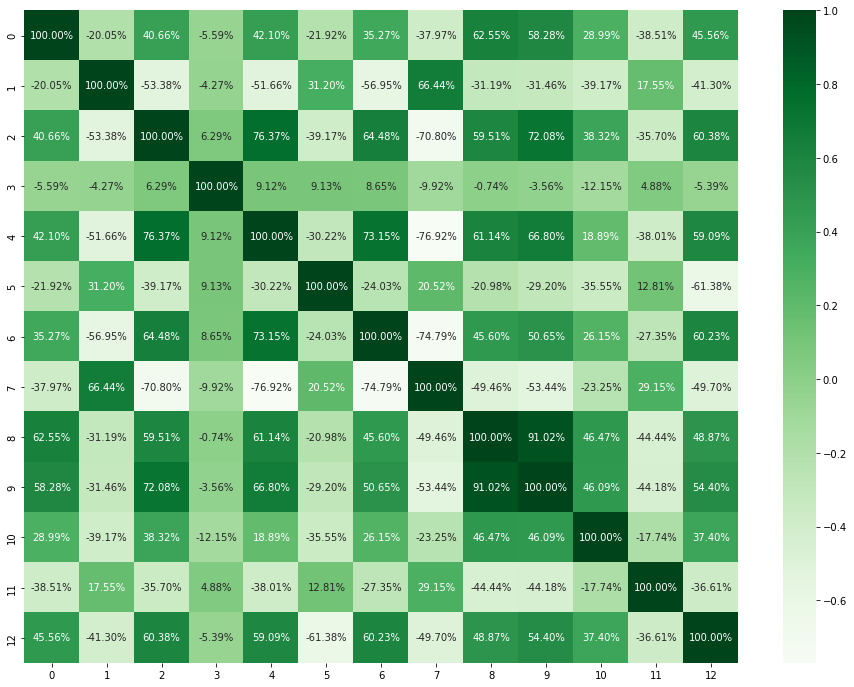

In [4]:
# TODO : Visualizing Feature Correlation
plt.figure(figsize = (16, 12))
sns.heatmap(housing.corr(), cmap = 'Greens', annot = True, fmt = '.2%')
plt.savefig('/content/features_correlation.png')

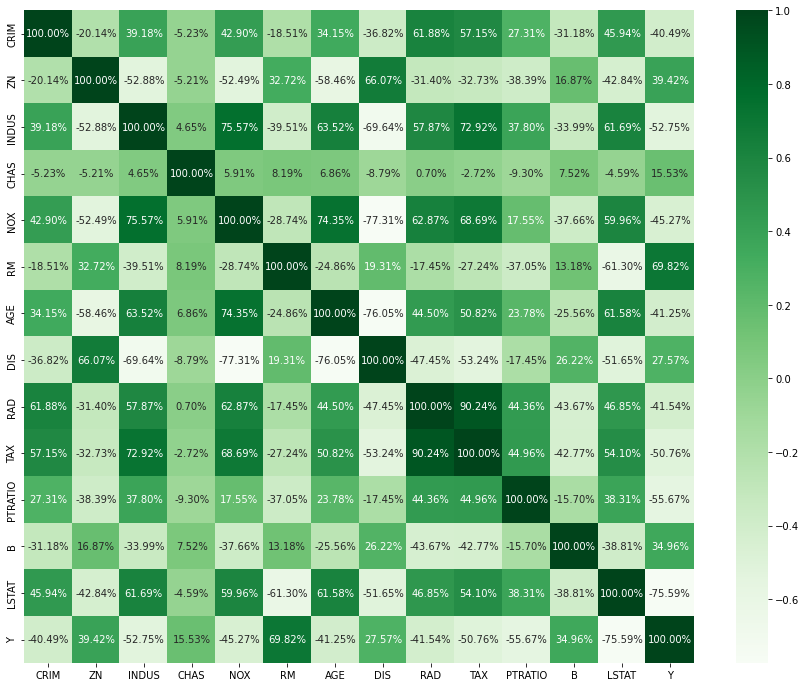

In [5]:
df['Y'] = Y_train                    # Adding the Target Variable into our DataFrame.

# Getting the Correlation Matrix for the DataFrame as :
plt.figure(figsize = (15, 12))
sns.heatmap(df.corr(), cmap = 'Greens', annot = True, fmt = '.2%')


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


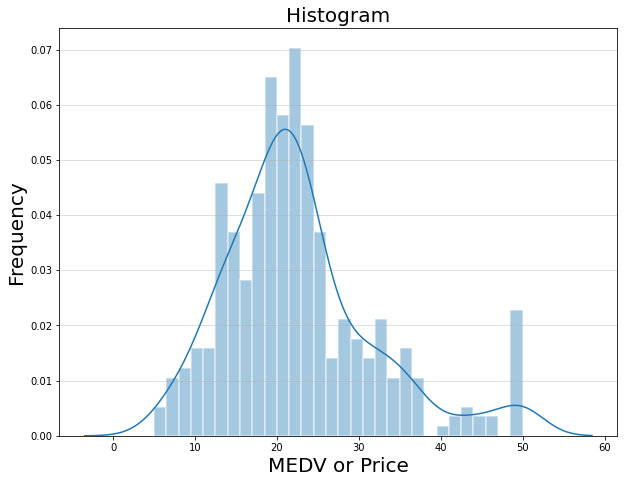

In [6]:
# Visualize Histogram Plot for 'target' feature that is MEDV
# Create and show Histogram
fig = plt.figure(figsize=(10,7.5))
plt.grid(axis='y', alpha=0.5)
ax = sns.distplot(df['Y'], bins=30, hist_kws=dict(edgecolor="w", linewidth=2))
ax.set_title('Histogram', fontsize=20)
ax.set_xlabel('MEDV or Price', fontsize=20)
ax.set_ylabel('Frequency', fontsize=20)
plt.show(fig)

X Train:  (265, 2)
Y Train:  (265,)
X Test:  (114, 2)
Y Test:  (114,)
y intercept 
  -0.26059789110837883
Linear Regresson Model

      LSTAT     RM  MEDV  Predicted MEDV
146   6.27  6.678  28.6       28.968975
306  16.47  5.851  19.5       17.600558
275  28.32  5.186  17.8        5.883802
270  34.77  4.906  13.8       -0.080602
215  10.27  6.140  20.8       23.433837
78    6.43  6.066  24.3       25.771670
362   5.50  7.007  23.6       31.170636
65    5.70  7.079  28.7       31.392315
176  18.33  5.914  17.8       16.605033
45   14.65  6.376  17.7       21.531248

 
 Linear Regression Model Performance:--  MSE: 27.01, MAE: 3.85


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


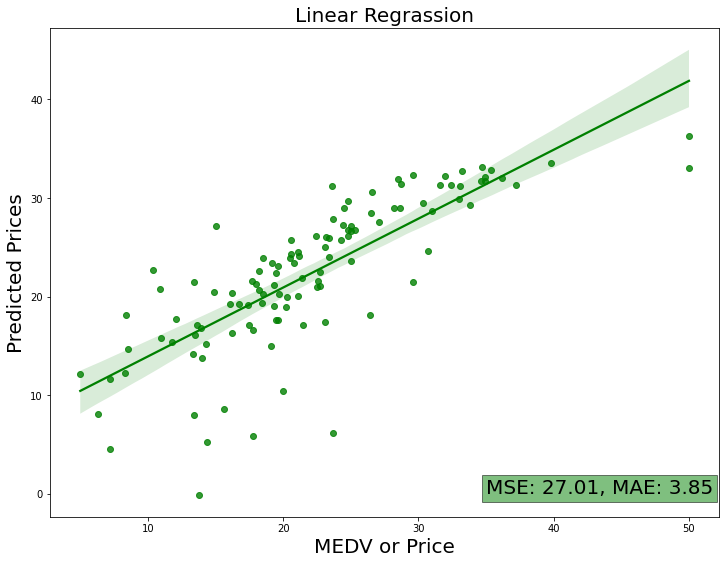

In [28]:
# Create Datasets for Target and Predictors
# Target value Y and Predictor values X. Thus, Y = Price, X = RM & LSTAT features
# Create dataset with RM and LSTAT
X = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT','RM'])
Y = df['Y'] # Create dataset with MEDV

# Split the dataset into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
print("X Train: ", X_train.shape)
print("Y Train: ", Y_train.shape)
print("X Test: ", X_test.shape)
print("Y Test: ", Y_test.shape)
# --------------------------------------------------------------
# Linear Rigression
# Split the dataset into train and test
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test) # Prediction
# Value of y intercept
print("y intercept \n ",lr.intercept_)

# Create Dataset with Testing values and Predicted Prices
print("Linear Regresson Model")
model_lr = pd.DataFrame(X_test)
model_lr['MEDV'] = Y_test
model_lr['Predicted MEDV'] = Y_pred
print("\n",model_lr.head(10))

# Measure Performance of the Model
# Get Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, Y_pred)
# Get Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y_test, Y_pred)

err = "MSE: " + str(round(mse, 2)) + "," + " MAE: " + str(round(mae, 2))
print("\n \n Linear Regression Model Performance:-- ", err)

fig = plt.figure(figsize=(12,9))
ax = sns.regplot(Y_test, Y_pred, marker = 'o', color = 'green')
ax.set_title('Linear Regrassion', fontsize=20)
ax.set_xlabel('MEDV or Price', fontsize=20)
ax.set_ylabel('Predicted Prices', fontsize=20)
# Save the Linear Regrassion Plot along with Error value
plt.text(35.0, 0.0, err, fontsize=20, bbox=dict(facecolor='green', alpha=0.5))
plt.show(fig)

KNN Regresson Model
     LSTAT     RM  MEDV  Predicted MEDV
146   6.27  6.678  28.6            23.1
306  16.47  5.851  19.5            12.7
275  28.32  5.186  17.8            13.2
270  34.77  4.906  13.8            14.4
215  10.27  6.140  20.8            18.2
78    6.43  6.066  24.3            23.1
362   5.50  7.007  23.6            23.9
65    5.70  7.079  28.7            23.9
176  18.33  5.914  17.8            19.1
45   14.65  6.376  17.7            23.2
KNN Regresson Model Performance:--  MSE: 33.91, MAE: 3.87


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


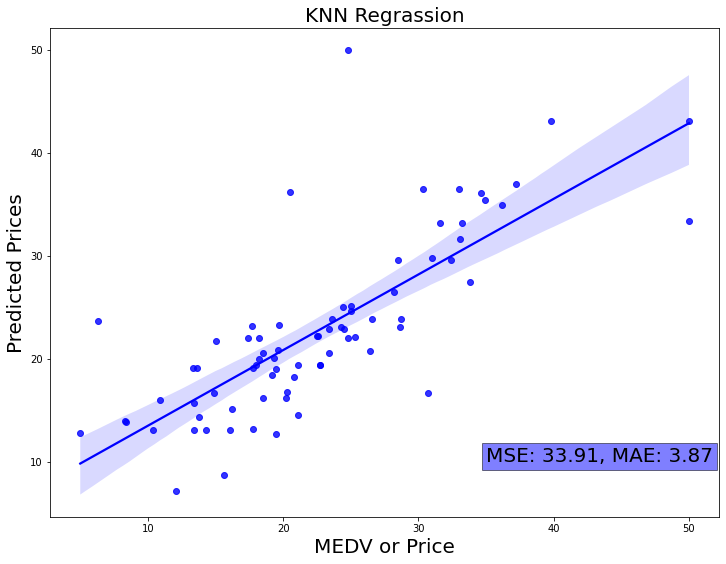

Gradient Boost Regresson Model
     LSTAT     RM  MEDV  Predicted MEDV
146   6.27  6.678  28.6       26.695350
306  16.47  5.851  19.5       16.878327
275  28.32  5.186  17.8       13.003866
270  34.77  4.906  13.8       14.111295
215  10.27  6.140  20.8       22.725373
78    6.43  6.066  24.3       22.080800
362   5.50  7.007  23.6       29.565824
65    5.70  7.079  28.7       30.949623
176  18.33  5.914  17.8       17.139526
45   14.65  6.376  17.7       19.235450
Gradient Boosting Regrassion Model Performance:--  MSE: 19.98, MAE: 3.05


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


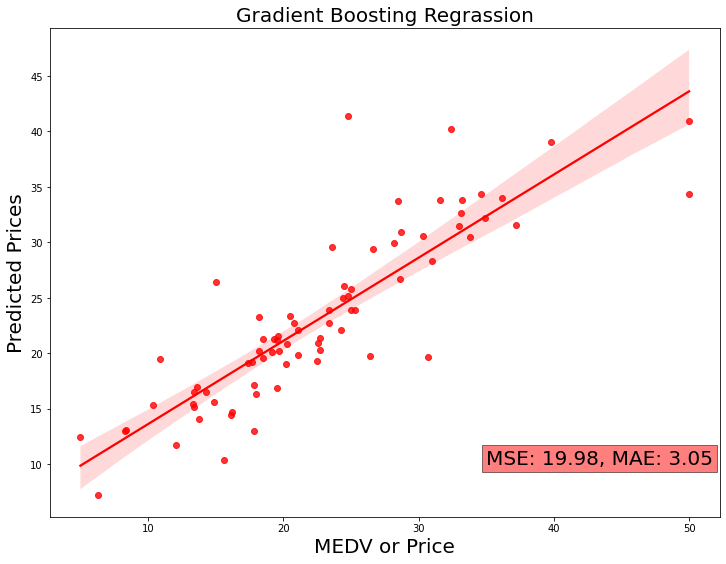

Gradient Boost Regression Cross Validation with KFold:
Kfold =  2 , MAE  0.71
Kfold =  3 , MAE  0.71
Kfold =  4 , MAE  0.71
Kfold =  5 , MAE  0.71


In [38]:
# --------------------------------------------------------------------
# KNN algorithm Training and Predictions
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=1)
knr.fit(X_train, Y_train)

Y_pred = knr.predict(X_test) # Prediction

# Create Dataset with Testing values and Predicted Prices
print("KNN Regresson Model")
model_knn = pd.DataFrame(X_test)
model_knn['MEDV'] = Y_test
model_knn['Predicted MEDV'] = Y_pred
print(model_knn.head(10))

# Measure Performance of the Model
# Get Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, Y_pred)
# Get Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y_test, Y_pred)

err = "MSE: " + str(round(mse, 2)) + "," + " MAE: " + str(round(mae, 2))
print("KNN Regresson Model Performance:-- ", err)

# Create Regression Plot for Test and Prediction values
fig = plt.figure(figsize=(12,9))
ax = sns.regplot(Y_test, Y_pred, marker = 'o', color = 'blue')
ax.set_title('KNN Regrassion', fontsize=20)
ax.set_xlabel('MEDV or Price', fontsize=20)
ax.set_ylabel('Predicted Prices', fontsize=20)
# Save the KNN Regrassion Plot along with Error value
plt.text(35.0, 10.0, err, fontsize=20, bbox=dict(facecolor='blue', alpha=0.5))

plt.show(fig)
# -------------------------------------------------------------------
# Gradient Boosting Tree Regression
# Split the dataset into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(X_train, Y_train)

Y_pred = gbr.predict(X_test) # Predictions

# Create Dataset with Testing values and Predicted Prices
print("Gradient Boost Regresson Model")
model_gbr = pd.DataFrame(X_test)
model_gbr['MEDV'] = Y_test
model_gbr['Predicted MEDV'] = Y_pred
print(model_gbr.head(10))

# Measure Performance of the Model
# Get Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, Y_pred)
# Get Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y_test, Y_pred)

err = "MSE: " + str(round(mse, 2)) + "," + " MAE: " + str(round(mae, 2))
print("Gradient Boosting Regrassion Model Performance:-- ", err)

fig = plt.figure(figsize=(12,9))
ax = sns.regplot(Y_test, Y_pred, marker = 'o', color = 'r')
ax.set_title('Gradient Boosting Regrassion', fontsize=20)
ax.set_xlabel('MEDV or Price', fontsize=20)
ax.set_ylabel('Predicted Prices', fontsize=20)
# Save the KNN Regrassion Plot along with Error value
plt.text(35.0, 10.0, err, fontsize=20, bbox=dict(facecolor='r', alpha=0.5))
plt.show(fig)
# ---------------------------------------------------------------
# Model Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
# Cross validate model with Kfold stratified cross val
# fold = KFold(n_splits=10, shuffle=True, random_state = 2)
# print(fold)

# Modeling step Test differents algorithms
# random_state = 2
# regressors = []
# regressors.append(LinearRegression())
# regressors.append(KNeighborsRegressor())
# regressors.append(GradientBoostingRegressor())

print("Gradient Boost Regression Cross Validation with KFold:")
kfolds = [2, 3, 4, 5]
for kfold in kfolds :
    cv_results = cross_val_score(gbr, X, Y, cv = KFold())
        # print(cv_results)
    # print(cv_results.mean())
    print("Kfold = ", kfold, ", MAE ", round(cv_results.mean(), 2))


In [ ]:
from sklearn.linear_model import LinearRegression
# Spliting target variable and independent variables
X = df.drop(['Y'], axis = 1)
Y = df['Y']
# Create a Linear regressor
LR = LinearRegression()

# Train the model using the training sets 
LR.fit(X_train, Y_train)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42)
print(X_train, X_test, Y_train, Y_test)

In [ ]:
"""print('R^2:',metrics.r2_score(Y_train,Y_test))
print('Adjusted R^2:',1 - (1-metrics.r2_score(Y_train, Y_pred))*(len(Y_train)-1)/(len(Y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(Y_train, Y_pred))
print('MSE:',metrics.mean_squared_error(Y_train, Y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_train, Y_pred)))"""

In [ ]:
"""phi = np.loadtxt(str(housing1),dtype='float', delimiter=',', skiprows=1,
                 usecols=tuple(range(0,14)))"""

In [ ]:
"""import numpy as np

# Import phi from train data set

phi = np.loadtxt('/content/task_4_boston_train.xlsx', dtype='float', delimiter=',', skiprows=1,
                 usecols=tuple(range(1, 14)))

# Import y from train data set
y = np.loadtxt('/content/task_4_boston_train.xlsx', dtype='float', delimiter=',', skiprows=1,
               usecols=14, ndmin=2)

# Import phi_test from test data set
phi_test = np.loadtxt('/content/task_4_boston_test.xlsx', dtype='float', delimiter=',',
                      skiprows=1, usecols=tuple(range(1, 14)))


# Add a cloloumn of 1s to right of phi and phi_test
phi_test = np.concatenate((phi_test, np.ones((105, 1))), axis=1)
phi = np.concatenate((phi, np.ones((400, 1))), axis=1)

# Min Max scaling for phi and phi_test (Feature Engineering)
for i in range(0, 13):
    col_max = max(phi[:, i])
    col_min = min(phi[:, i])
    phi[:, i] = (phi[:, i] - col_min) / (col_max - col_min)
    phi_test[:, i] = (phi_test[:, i] - col_min) / (col_max - col_min)

# Log scaling on y
y = np.log(y)


# Function to calculate change in error function
def delta_w(p, phi, w):
    if p == 2:
        deltaw = (2 * (np.dot(np.dot(np.transpose(phi), phi), w) -
                       np.dot(np.transpose(phi), y)) +
                  lambd * p * np.power(np.absolute(w), (p - 1)))
    if p < 2 and p > 1:
        deltaw = (2 * (np.dot(np.dot(np.transpose(phi), phi), w) -
                       np.dot(np.transpose(phi), y)) +
                  lambd * p * np.power(np.absolute(w), (p - 1)) * np.sign(w))
    return deltaw


# Dictionary containing filenames as keys and p as values
filenames = {'output.csv': 2.0,
             'output_p1.csv': 1.75,
             'output_p2.csv': 1.5,
             'output_p3.csv': 1.3
             }

# For each item in this dictionary
for (fname, p) in filenames.items():
    # Set initial w to zeros
    w = np.zeros((14, 1))

    # Hyperparameter lambda value
    lambd = 0.2

    # Maximum step size
    t = 0.00012

    # Calculate new value of w
    w_new = w - t * delta_w(p, phi, w)

    i = 0
    # Repeat steps until error between consecutive w is less than threshold
    while(np.linalg.norm(w_new-w) > 10 ** -10):
        w = w_new
        w_new = w - t * delta_w(p, phi, w)
        i = i + 1

    # Load values of id
    id_test = np.loadtxt('/content/task_4_boston_test.xlsx', dtype='int', delimiter=',',
                         skiprows=1, usecols=0, ndmin=2)

    # Calculate y for test data
    y_test = np.exp(np.dot(phi_test, w_new))

    # Save the ids and y
    np.savetxt(fname, np.concatenate((id_test, y_test), axis=1),
               delimiter=',', fmt=['%d', '%f'], header='ID,MEDV', comments='')"""